<a href="https://www.kaggle.com/code/rajatraj0502/zomato-new?scriptVersionId=137750461" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/zomato/zomato.csv')

# Display the first few rows of the DataFrame
df.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [2]:
# Display the size of the dataset
print(f"Size of the dataset: {df.shape}")

# Display the basic statistical details of the dataset
print("\nBasic statistical details:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Size of the dataset: (56252, 13)

Basic statistical details:
              address           name online_order book_table   rate  votes  \
count           56235          56236        56233      56194  48414  56174   
unique          13397          11914         2639       2902   2877   5195   
top      ('Rated 4.0'   ('Rated 4.0'          Yes         No    NEW      0   
freq              942            300        30444      45268   2208  10027   

                phone location    rest_type     dish_liked      cuisines  \
count           54956    56126        55914          28027         56049   
unique          17712     2920         2961           8067          5553   
top      ('Rated 4.0'      BTM  Quick Bites   ('Rated 4.0'  North Indian   
freq              412     5125        19132            407          2913   

       approx_cost(for two people) listed_in(type)  
count                        55731           51642  
unique                        2879            2783  
top     

In [3]:
# Check the unique values in 'online_order' and 'book_table' columns
online_order_unique_values = df['online_order'].unique()
book_table_unique_values = df['book_table'].unique()

online_order_unique_values, book_table_unique_values


(array(['Yes', 'No', " ('Rated 4.0'", ...,
        ' ""RATED\\n  Truly what a wonderful place. From the walk through the green route to the actual place',
        ' dirty tables etc... is really a turn off...\\n\\nFood - 7/10\\n\\nVeg Nachos - Lacks the punch... wish the salsa tasted better... nd also wud be grt if u cud introduce an option without gluocumole (not really a fan of it)\\n\\nVeg Sheek Kabab - Tasted Grt',
        " 'RATED\\n  Beer cafe "], dtype=object),
 array(['Yes', 'No', " 'RATED\\n  Amazing cafe", ...,
        ' ""RATED\\n  A decent place to have some traditional oriental cuisine. We were craving for some kick-ass noodles. While we did get the noodles',
        ' but cud be a bit less spicy... otherwise was grt',
        'VR Bengaluru\\nBeen here a few times '], dtype=object))

In [4]:
# Keep only the rows where 'online_order' and 'book_table' are either 'Yes' or 'No'
df_cleaned = df[df['online_order'].isin(['Yes', 'No']) & df['book_table'].isin(['Yes', 'No'])]

# Display the unique values in 'online_order' and 'book_table' in the cleaned data
online_order_unique_values_cleaned = df_cleaned['online_order'].unique()
book_table_unique_values_cleaned = df_cleaned['book_table'].unique()

online_order_unique_values_cleaned, book_table_unique_values_cleaned


(array(['Yes', 'No'], dtype=object), array(['Yes', 'No'], dtype=object))

In [5]:
# Check the unique values in 'rate' column
rate_unique_values = df_cleaned['rate'].unique()
rate_unique_values


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [6]:
# Remove '/5' from 'rate' column and convert it to numeric values
df_cleaned['rate'] = df_cleaned['rate'].str.replace('/5', '')
df_cleaned['rate'] = df_cleaned['rate'].replace(['NEW', '-'], '0')

# Convert the 'rate' column to numeric type
df_cleaned['rate'] = pd.to_numeric(df_cleaned['rate'], errors='coerce')

# Check the unique values in 'rate' column after cleaning
rate_unique_values_cleaned = df_cleaned['rate'].unique()
rate_unique_values_cleaned


/tmp/ipykernel_20/771381301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].str.replace('/5', '')
/tmp/ipykernel_20/771381301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].replace(['NEW', '-'], '0')
/tmp/ipykernel_20/771381301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [7]:
# Check the unique values in 'votes' column
votes_unique_values = df_cleaned['votes'].unique()
votes_unique_values


array(['775', '787', '918', ..., '4957', '2382', '843'], dtype=object)

In [8]:
# Convert the 'votes' column to numeric type
df_cleaned['votes'] = pd.to_numeric(df_cleaned['votes'], errors='coerce')

# Check the unique values in 'votes' column after conversion
votes_unique_values_cleaned = df_cleaned['votes'].unique()
votes_unique_values_cleaned


/tmp/ipykernel_20/1282675126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['votes'] = pd.to_numeric(df_cleaned['votes'], errors='coerce')


array([ 775,  787,  918, ..., 4957, 2382,  843])

In [9]:
# Check the unique values in 'approx_cost(for two people)' column
approx_cost_unique_values = df_cleaned['approx_cost(for two people)'].unique()
approx_cost_unique_values


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [10]:
# Remove comma separators and convert the 'approx_cost(for two people)' column to numeric type
df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',', '')
df_cleaned['approx_cost(for two people)'] = pd.to_numeric(df_cleaned['approx_cost(for two people)'], errors='coerce')

# Check the unique values in 'approx_cost(for two people)' column after cleaning
approx_cost_unique_values_cleaned = df_cleaned['approx_cost(for two people)'].unique()
approx_cost_unique_values_cleaned


/tmp/ipykernel_20/307470335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',', '')
/tmp/ipykernel_20/307470335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['approx_cost(for two people)'] = pd.to_numeric(df_cleaned['approx_cost(for two people)'], errors='coerce')


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [11]:
# Fill missing values in 'rate' and 'votes' with 0
df_cleaned['rate'] = df_cleaned['rate'].fillna(0)
df_cleaned['votes'] = df_cleaned['votes'].fillna(0)

# Fill missing values in 'approx_cost(for two people)' with the median cost
median_cost = df_cleaned['approx_cost(for two people)'].median()
df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].fillna(median_cost)

# Check for missing values in the cleaned dataset
missing_values_cleaned = df_cleaned.isnull().sum()
missing_values_cleaned


/tmp/ipykernel_20/3243886376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].fillna(0)
/tmp/ipykernel_20/3243886376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['votes'] = df_cleaned['votes'].fillna(0)
/tmp/ipykernel_20/3243886376.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)        0
listed_in(type)                 4361
dtype: int64

In [12]:
# Display the first few rows of the cleaned dataset
df_cleaned.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


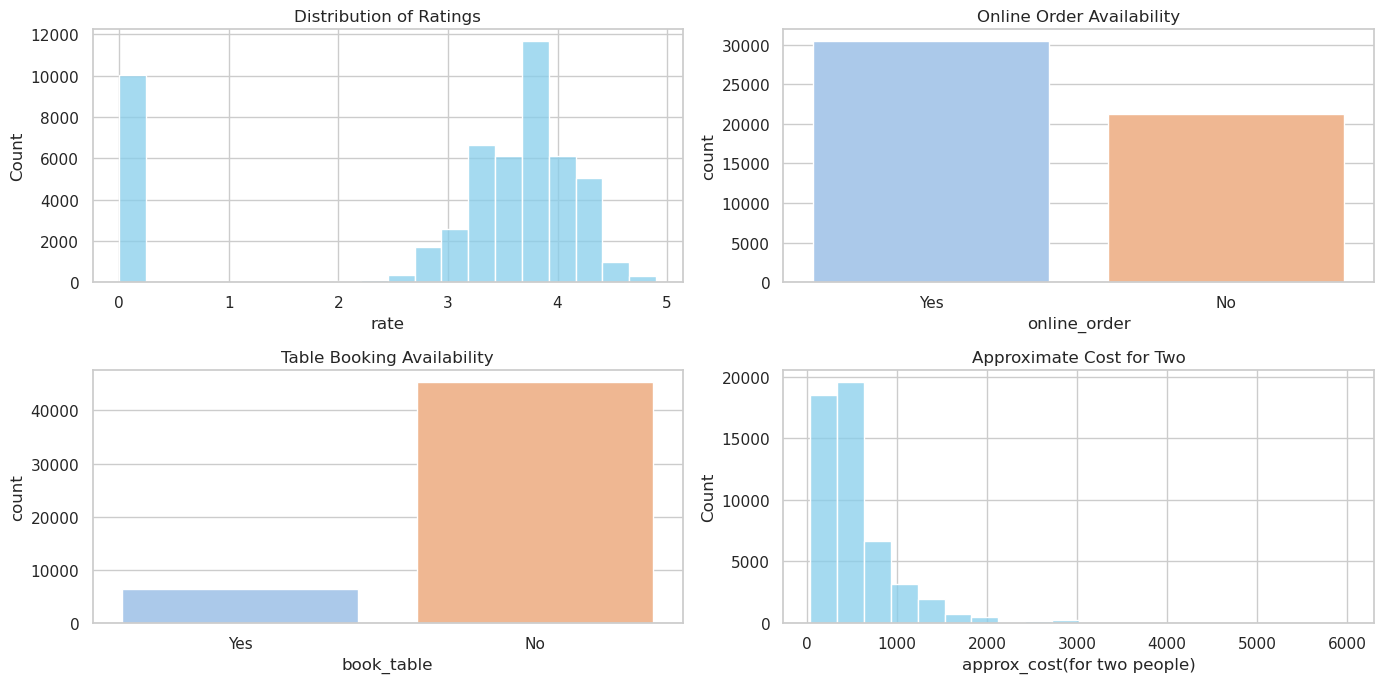

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Define the figure size
plt.figure(figsize=(14, 7))

# Distribution of Ratings
plt.subplot(221)
sns.histplot(df_cleaned['rate'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Ratings')

# Online Order Availability
plt.subplot(222)
sns.countplot(x='online_order', data=df_cleaned, palette='pastel')
plt.title('Online Order Availability')

# Table Booking Availability
plt.subplot(223)
sns.countplot(x='book_table', data=df_cleaned, palette='pastel')
plt.title('Table Booking Availability')

# Approximate Cost for Two
plt.subplot(224)
sns.histplot(df_cleaned['approx_cost(for two people)'], bins=20, kde=False, color='skyblue')
plt.title('Approximate Cost for Two')

# Adjust the layout
plt.tight_layout()

plt.show()


In [14]:
from collections import Counter

# Helper function to get the most common terms in a column
def get_most_common_terms(series, top_n=10):
    # Split the series into a list of terms
    terms_list = series.dropna().str.split(', ').sum()
    
    # Count the terms and get the most common ones
    most_common_terms = Counter(terms_list).most_common(top_n)
    
    return most_common_terms

# Get the top 10 cuisines, restaurant types, and locations
top_cuisines = get_most_common_terms(df_cleaned['cuisines'])
top_rest_types = get_most_common_terms(df_cleaned['rest_type'])
top_locations = get_most_common_terms(df_cleaned['location'])

top_cuisines, top_rest_types, top_locations


([('North Indian', 21085),
  ('Chinese', 15547),
  ('South Indian', 8644),
  ('Fast Food', 8096),
  ('Biryani', 6492),
  ('Continental', 5765),
  ('Desserts', 5633),
  ('Cafe', 5303),
  ('Beverages', 4747),
  ('Italian', 3389)],
 [('Quick Bites', 20639),
  ('Casual Dining', 13057),
  ('Cafe', 5074),
  ('Delivery', 4641),
  ('Dessert Parlor', 3211),
  ('Bar', 2457),
  ('Takeaway', 2157),
  ('Bakery', 1998),
  ('Beverage Shop', 1471),
  ('Pub', 950)],
 [('BTM', 5124),
  ('HSR', 2523),
  ('Koramangala 5th Block', 2504),
  ('Whitefield', 2374),
  ('JP Nagar', 2235),
  ('Indiranagar', 2083),
  ('Jayanagar', 1926),
  ('Marathahalli', 1846),
  ('Bannerghatta Road', 1630),
  ('Bellandur', 1286)])

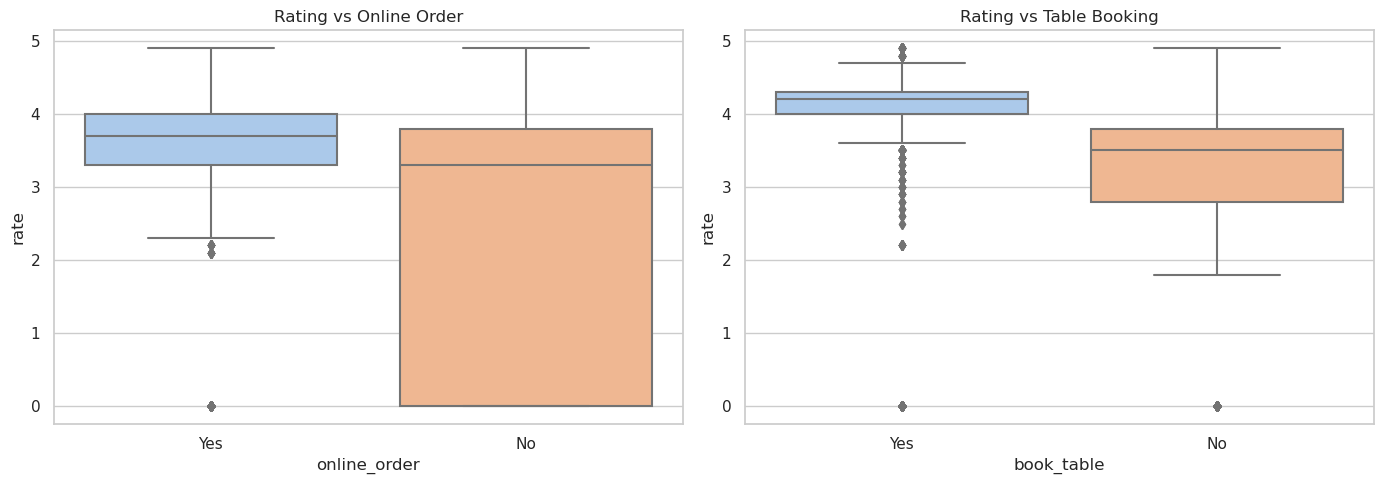

In [15]:
# Define the figure size
plt.figure(figsize=(14, 5))

# Rating vs Online Order
plt.subplot(121)
sns.boxplot(x='online_order', y='rate', data=df_cleaned, palette='pastel')
plt.title('Rating vs Online Order')

# Rating vs Table Booking
plt.subplot(122)
sns.boxplot(x='book_table', y='rate', data=df_cleaned, palette='pastel')
plt.title('Rating vs Table Booking')

# Adjust the layout
plt.tight_layout()

plt.show()


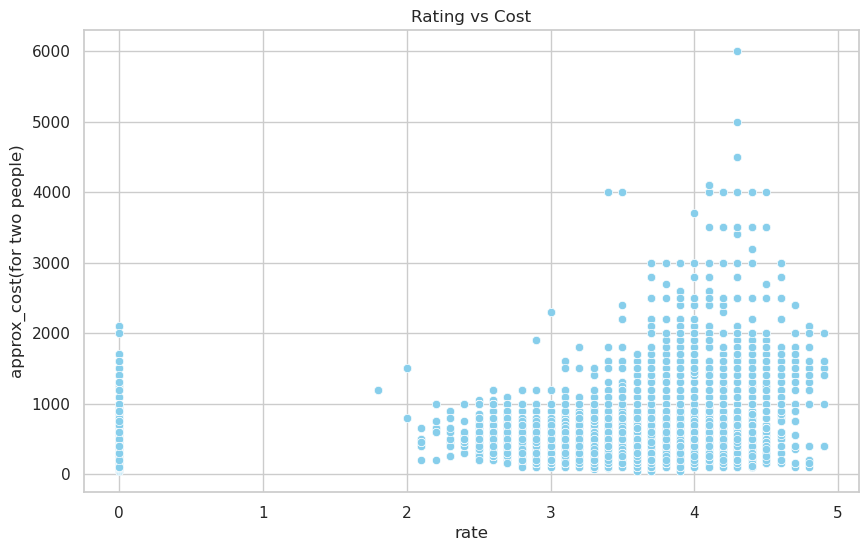

In [16]:
# Rating vs Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='approx_cost(for two people)', data=df_cleaned, color='skyblue')
plt.title('Rating vs Cost')
plt.show()
